# Week 4 - Error Analysis & Integration Intro

In [2]:
import numpy as np
import plotly.graph_objects as go

## Error Analysis

**Practice**

Consider the function $f(x) = \sin(x)(1-x)$. The goal of this problem is to make sense of the discussion of the "order" of the derivative approximation.

* Find f'(x) by hand
* Verify that $f'(1) = -\sin(1) \approx -0.841471$
* To approximate the first derivative at $x=1$ numerically with our first order approximation formula, we calculate

$$
\frac{f(1+h) - ??}{??}
$$

| $h$ | Approx. of $f'(1)$ | Exact Value of $f'(1)$ | Absolute % Error |
-------| -----| -----| -----|
| $2^{-1}$ |  | -0.841471 | $\frac{|A - E|}{E} \times 100 =
18.54181
\%$|
| $2^{-2}$ |  | -0.841471  |  |
| $2^{-3}$ |  | -0.841471 |  |

In [ ]:
# let's start with defining h
h = 2**(-3)
print('The step size is',h)

# define approximation as out
out = (np.sin(1+h)*(1-1-h) - np.sin(1)*0)/h
print('The approximation is', out)
# define exact
print('The exact value is', -np.sin(1))
# the absolute % error
print('The absolute % error is', abs(out - -np.sin(1))/np.sin(1) * 100)

The step size is 0.125
The approximation is -0.9022675940990952
The exact value is -0.8414709848078965
The absolute % error is 7.225039292956516


The following code will help automate this process

In [ ]:
2.0**(-np.arange(1,10))

array([0.5       , 0.25      , 0.125     , 0.0625    , 0.03125   ,
       0.015625  , 0.0078125 , 0.00390625, 0.00195312])

h= 0.5 	 Absolute Pct Error= 0.1854181601184709
h= 0.25 	 Absolute Pct Error= 0.12776867710089196 with error reduction 1.4512020029138777
h= 0.125 	 Absolute Pct Error= 0.07225039292956516 with error reduction 1.7684149790776915
h= 0.0625 	 Absolute Pct Error= 0.03815217748298682 with error reduction 1.8937423155410655
h= 0.03125 	 Absolute Pct Error= 0.019573887040617487 with error reduction 1.9491364900501262
h= 0.015625 	 Absolute Pct Error= 0.009910221068472835 with error reduction 1.9751211305353678
h= 0.0078125 	 Absolute Pct Error= 0.004985780110301419 with error reduction 1.9876971806271069
h= 0.00390625 	 Absolute Pct Error= 0.00250053851755135 with error reduction 1.9938825478216344
h= 0.001953125 	 Absolute Pct Error= 0.0012521789951432975 with error reduction 1.9969497390149018


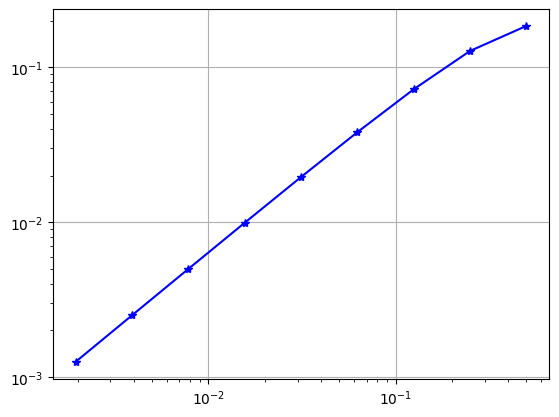

In [ ]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# define the exact value of f'(1)
exact = -np.sin(1)
# create an array of stepsizes from 2^(-1) to 2^(-10)
H = 2.0**(-np.arange(1,10))
AbsPctError = [] # start off with a blank list of errors

for h in H:
  # define approximation
  approx = # FILL THIS IN
  # calculate the abs percent error
  AbsPctError.append( np.abs( (approx - exact)/exact ) )
  if h==H[0]:
    print("h=",h,"\t Absolute Pct Error=", AbsPctError[-1])
  else:
    err_reduction_factor = AbsPctError[-2]/AbsPctError[-1]
    print("h=",h,"\t Absolute Pct Error=", AbsPctError[-1],
              "with error reduction",err_reduction_factor)

plt.loglog(H,AbsPctError,'b-*') # Why are we build a loglog plot?
plt.grid()
plt.show()

## Efficient Coding

Now, let's build a Python function that accepts
* a mathematical funciton
* the bounds of an interval,
* and the number of subintervals.


Some notes:
 * We can build Python functions in two ways:
  - First, we can use the following format
  ```python
  def funname(input):
    #some operation
    return output
  ```
  - Next, we can use **lambda** functions (in one line)
  ```python
  funname = lambda x: #some operation with x
  ```



 * A lambda function is a small anonymous function and usually only takes up one line of code
 * A lambda function can take any number of arguments, but can only have one expression.



In [ ]:
def mydiv(a,b):

In [ ]:
# lambda function
mydiv2 = lambda x, y: x/y

In [ ]:
mydiv2(5,2)

2.5

In [ ]:
def FirstDeriv(f, a, b, N):
  # define the grid
  x = np.linspace(a,b,N+1)
  # define the step size
  h = x[1] - x[0]
  # create an empty array for the first derivative
  df = []

  # calculate the deriv approx at each point
  for j in np.arange(len(x) - 1):
    df.append((f(x[j+1]) - f(x[j]))/ h )

  return df

In [ ]:
# define f as lambda function w/ sin(x)
f = ...
# define the derivative with a lambda function
exact_df = ...
# define the end points and number of sub intervals
a = ...
b = ...
N = ...
# define x (for the plotting)
x = ...

# apply FirstDeriv function, save to df
df = ...

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=x, y=f(x),  name='f(x) = sin(x)'))
fig.add_trace(go.Scatter(x=x, y=exact_df(x), name='exact first deriv.'))
fig.add_trace(go.Scatter(x=x, y=df, name = 'approx first deriv.'))

Output hidden; open in https://colab.research.google.com to view.

Change $a, b,$ or $N$ and write one or two observations you see.

## Integration

**Practice**

Consider the shaded area of the region under the function between $x=0$ and $x=2$.  

<img src='https://numericalmethodssullivan.github.io/images/Ch03_InitialIntegral.png' width="400">


* What rectangle (with area 6) gives an upper bound for the area under the curve? Can you give a better upper bound?


* Why must the area under the curve be greater than 3?

* Is the area greater than 4? Why/Why not?

* Work with your partner to give an estimate of the area and provide an estimate for the amount of error that you're making.


Estimates:

In [ ]:
area_est = []
np.mean(area_est)

3.6835833333333334

**Practice**

Write code to approximate an integral with Riemann sums. You should ALWAYS start by writing pseudo-code as comments in your function. Your Python function should accept a Python Function, a lower bound, an upper bound, the number of subintervals. Test your code on several functions for which you know the integral. You should write your code without any loops.

We need:
* step size - $\Delta x = h$
* $f(x)$
* we need the bounds $a,b$
* for Left-aligned R.S., we need the function values at the 'left' points in the interval $[a,b]$

In [15]:
def riemann_left(f, a, b, N):
  x = np.linspace(a,b,N+1)
  h = x[1] - x[0]
  print(h)
  print(x)
  areas = f(x[0:N])*h # Q: how does this only evaluate at left points?
  rsum = sum(areas)

  return rsum

In [23]:
f = lambda x: np.cos(x)

a = 0
b = 1
N = 8

riemann_left(f, a, b, N)

0.125
[0.    0.125 0.25  0.375 0.5   0.625 0.75  0.875 1.   ]


0.8691061399106281

**Theorem**

In approximating the integral $\int_a^b f(x) dx$ with a fixed interval width $\Delta x$ we find an absolute percent error $P$.

* If we use left rectangles and an interval width of $\frac{\Delta x}{M}$ then the absolute percent error will be approximately $\underline{\hspace{1in}}$.

* If we use right rectangles and an interval width of $\frac{\Delta x}{M}$ then the absolute percent error will be approximately $\underline{\hspace{1in}}$.


The previous theorem could be stated in an equivalent way.

In approximating the integral $\int_a^b f(x) dx$ with a fixed interval number of subintervals we find an absolute percent error $P$.

* If we use left rectangles and $M$ times as many subintervals then the absolute percent error will be approximately $\underline{\hspace{1in}}$.

* If we use right rectangles and $M$ times as many subintervals then the absolute percent error will be approximately $\underline{\hspace{1in}}$.